# iWildCam 2019 - FGVC6
Categorize animals in the wild
https://www.kaggle.com/c/iwildcam-2019-fgvc6

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [12]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import pandas as pd

In [4]:
path = Config.data_path()/'iwildcam-2019-fgvc6'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/storage/iwildcam-2019-fgvc6')

In [8]:
#! kaggle competitions download -c iwildcam-2019-fgvc6 -p {path} 

test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test_images.zip: Skipping, found more recently modified local copy (use --force to force download)
train_images.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
#! ls {path}

sample_submission.csv.zip  test_images.zip  train_images.zip
test.csv.zip		   train.csv.zip


In [10]:
#! unzip -q -n {path}/sample_submission.csv.zip -d {path}

In [13]:
#! unzip -q -n {path}/test_images.zip -d {path}/test_images

In [19]:
#! unzip -q -n {path}/train_images.zip -d {path}/train_images

In [9]:
! ls {path}

sample_submission.csv  test.csv  test_images  train.csv  train_images


In [14]:
train_csv_pd = pd.read_csv(path/'train.csv'); train_csv_pd.head()

category_id        date_captured                                 file_name  \
0           19  2011-05-13 23:43:18  5998cfa4-23d2-11e8-a6a3-ec086b02610b.jpg   
1           19  2012-03-17 03:48:44  588a679f-23d2-11e8-a6a3-ec086b02610b.jpg   
2            0  2014-05-11 11:56:46  59279ce3-23d2-11e8-a6a3-ec086b02610b.jpg   
3            0  2013-10-06 02:00:00  5a2af4ab-23d2-11e8-a6a3-ec086b02610b.jpg   
4            0  2011-07-12 13:11:16  599fbd89-23d2-11e8-a6a3-ec086b02610b.jpg   

   frame_num                                    id  location  rights_holder  \
0          1  5998cfa4-23d2-11e8-a6a3-ec086b02610b        33   Justin Brown   
1          2  588a679f-23d2-11e8-a6a3-ec086b02610b       115   Justin Brown   
2          1  59279ce3-23d2-11e8-a6a3-ec086b02610b        96  Erin Boydston   
3          1  5a2af4ab-23d2-11e8-a6a3-ec086b02610b        57  Erin Boydston   
4          3  599fbd89-23d2-11e8-a6a3-ec086b02610b        46   Justin Brown   

                                 seq_id  seq_num_frames  width  height  
0  6f084ccc-5567-11e8-bc84-dca9047ef277               3   1024     747  
1  6f12067d-5567-11e8-b3c0-dca9047ef277               3   1024     747  
2  6faa92d1-5567-11e8-b1ae-dca9047ef277               1   1024     747  
3  6f7d4702-5567-11e8-9e03-dca9047ef277               1   1024     747  
4  6f1728a1-5567-11e8-9be7-dca9047ef277               3   1024     747

In [8]:
fnames = get_image_files(path/'train_images')
fnames[:5]

[PosixPath('/storage/iwildcam-2019-fgvc6/train_images/58ce3ebf-23d2-11e8-a6a3-ec086b02610b.jpg'),
 PosixPath('/storage/iwildcam-2019-fgvc6/train_images/598f789c-23d2-11e8-a6a3-ec086b02610b.jpg'),
 PosixPath('/storage/iwildcam-2019-fgvc6/train_images/596a4c44-23d2-11e8-a6a3-ec086b02610b.jpg'),
 PosixPath('/storage/iwildcam-2019-fgvc6/train_images/59641dae-23d2-11e8-a6a3-ec086b02610b.jpg'),
 PosixPath('/storage/iwildcam-2019-fgvc6/train_images/59a94b79-23d2-11e8-a6a3-ec086b02610b.jpg')]

In [17]:
??ImageDataBunch.from_csv

In [16]:
img_transforms = get_transforms(flip_vert=False, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [29]:
np.random.seed(42)
bs = 32
data = ImageDataBunch.from_csv(path, folder="train_images", fn_col=2, label_col=0, valid_pct=0.2, 
                               csv_labels='train.csv',
                               ds_tfms=img_transforms, size=224, bs=bs, num_workers=4).normalize(imagenet_stats)

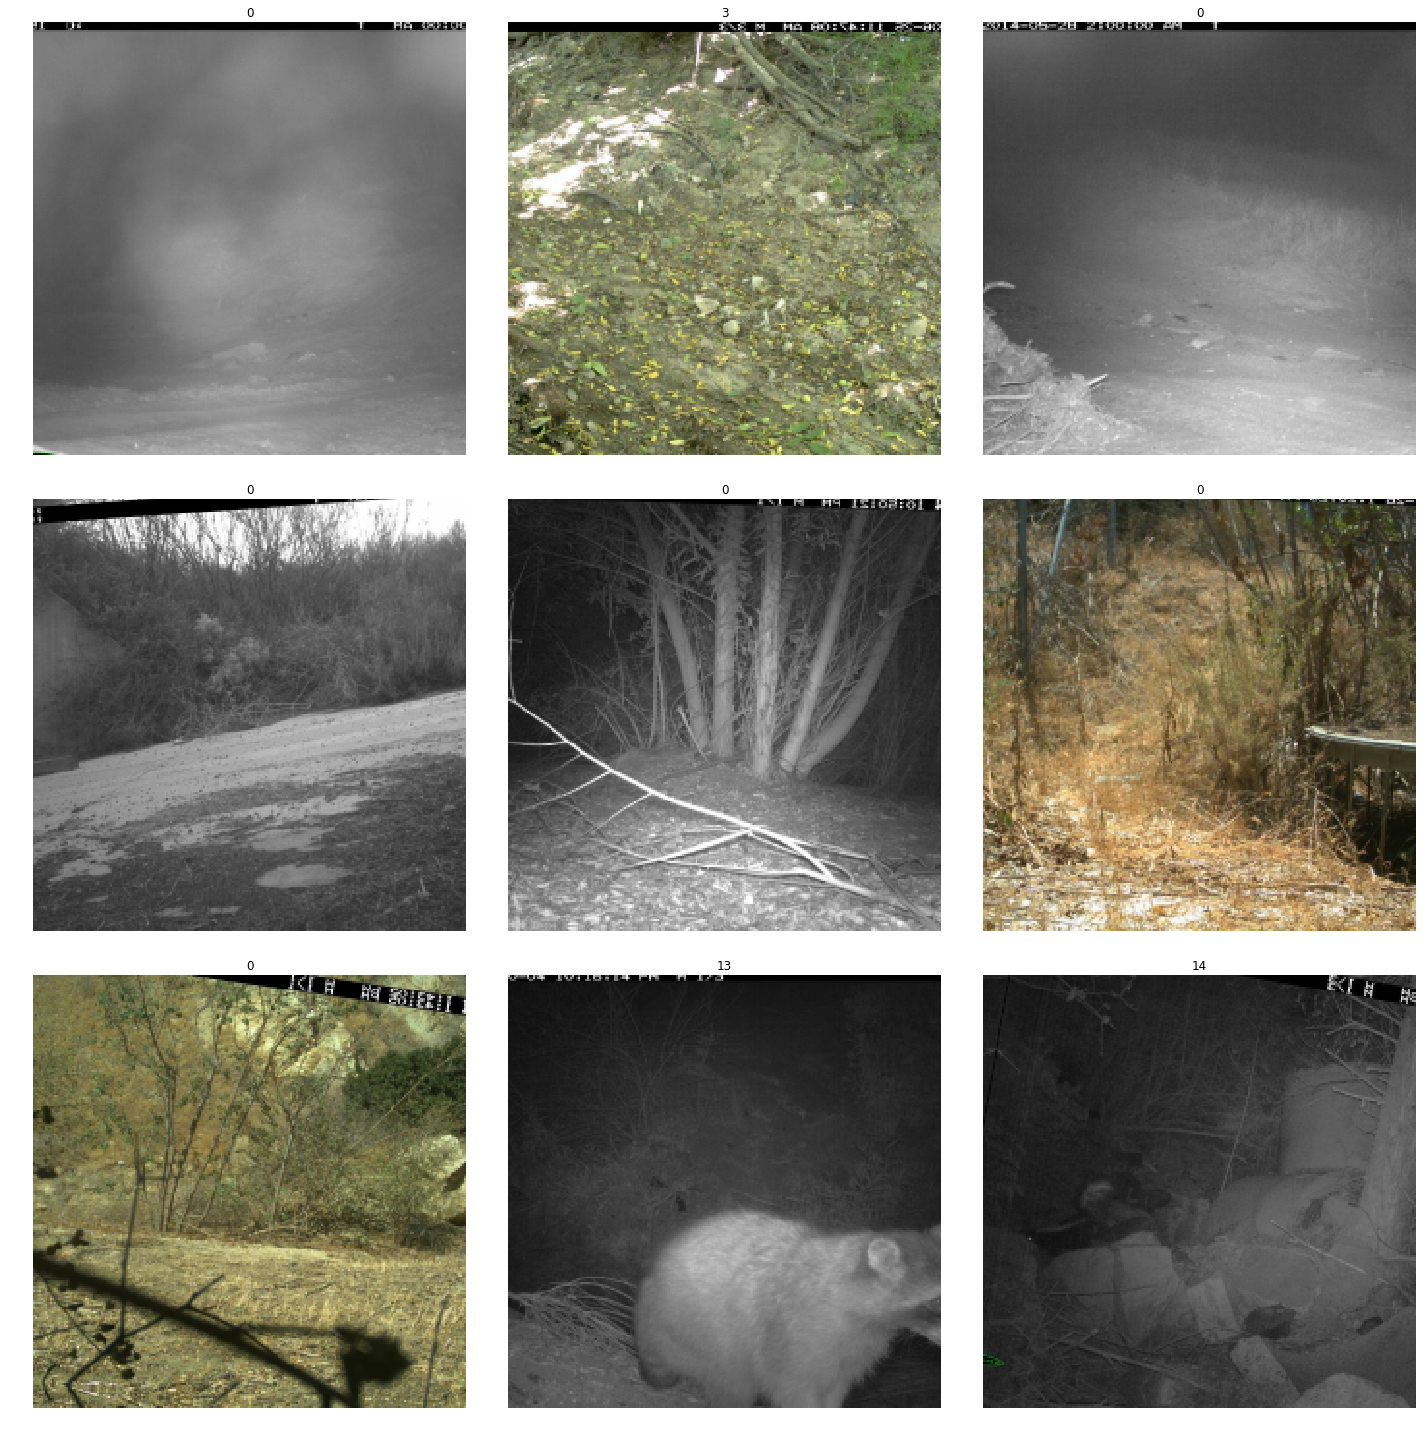

In [30]:
data.show_batch(rows=3, figsize=(20,20))

In [26]:
print(data.classes)
len(data.classes),data.c

[0, 1, 3, 4, 8, 10, 11, 13, 14, 16, 17, 18, 19, 22]


(14, 14)

In [31]:
data.save('data')

## Training: resnet50

In [32]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


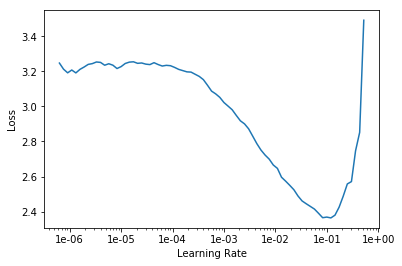

In [33]:
learn.lr_find()
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(8)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [35]:
learn.save('stage-1-50')

In [36]:
learn.load('stage-1-50')

Learner(data=ImageDataBunch;

Train: LabelList (157040 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
19,19,0,0,3
Path: /storage/iwildcam-2019-fgvc6;

Valid: LabelList (39259 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,0,0,19,0
Path: /storage/iwildcam-2019-fgvc6;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   

In [37]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


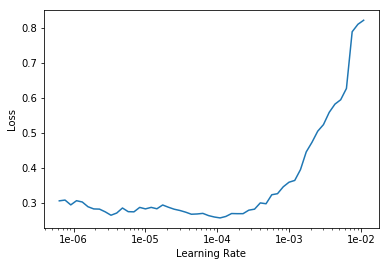

In [38]:
learn.lr_find()
learn.recorder.plot()

In [39]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

In [40]:
learn.save('stage-2-50')

In [41]:
learn.load('stage-2-50')

Learner(data=ImageDataBunch;

Train: LabelList (157040 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
19,19,0,0,3
Path: /storage/iwildcam-2019-fgvc6;

Valid: LabelList (39259 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,0,0,19,0
Path: /storage/iwildcam-2019-fgvc6;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   

## Results

In [42]:
interp = ClassificationInterpretation.from_learner(learn)

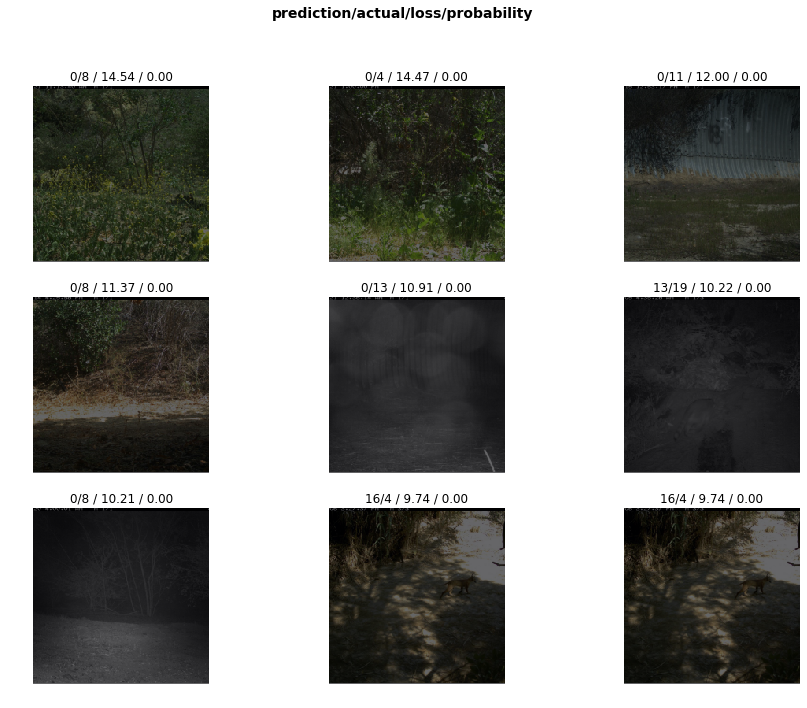

In [43]:
interp.plot_top_losses(9, figsize=(15,11))

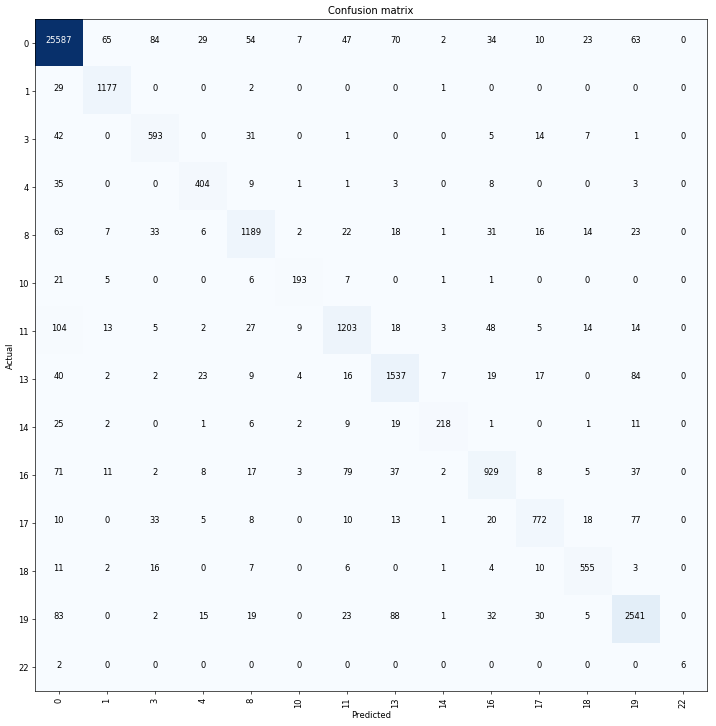

In [44]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [46]:
interp.most_confused(min_val=20)

[(11, 0, 104),
 (19, 13, 88),
 (0, 3, 84),
 (13, 19, 84),
 (19, 0, 83),
 (16, 11, 79),
 (17, 19, 77),
 (16, 0, 71),
 (0, 13, 70),
 (0, 1, 65),
 (0, 19, 63),
 (8, 0, 63),
 (0, 8, 54),
 (11, 16, 48),
 (0, 11, 47),
 (3, 0, 42),
 (13, 0, 40),
 (16, 13, 37),
 (16, 19, 37),
 (4, 0, 35),
 (0, 16, 34),
 (8, 3, 33),
 (17, 3, 33),
 (19, 16, 32),
 (3, 8, 31),
 (8, 16, 31),
 (19, 17, 30),
 (0, 4, 29),
 (1, 0, 29),
 (11, 8, 27),
 (14, 0, 25),
 (0, 18, 23),
 (8, 19, 23),
 (13, 4, 23),
 (19, 11, 23),
 (8, 11, 22),
 (10, 0, 21),
 (17, 16, 20)]

## Submitting results to kaggle

In [47]:
learn.export()

In [58]:
??ImageList.from_df

In [49]:
test_csv_pd = pd.read_csv(path/'test.csv'); test_csv_pd.head()

date_captured                                 file_name  frame_num  \
0  2016-01-03 11:30:56  bce932f6-2bf6-11e9-bcad-06f10d5896c4.jpg          1   
1  2016-01-03 11:30:57  bce932f7-2bf6-11e9-bcad-06f10d5896c4.jpg          2   
2  2016-01-03 11:30:58  bce932f8-2bf6-11e9-bcad-06f10d5896c4.jpg          3   
3  2016-01-03 11:30:59  bce932f9-2bf6-11e9-bcad-06f10d5896c4.jpg          4   
4  2016-01-03 11:31:00  bce932fa-2bf6-11e9-bcad-06f10d5896c4.jpg          5   

                                     id  location  \
0  bce932f6-2bf6-11e9-bcad-06f10d5896c4        37   
1  bce932f7-2bf6-11e9-bcad-06f10d5896c4        37   
2  bce932f8-2bf6-11e9-bcad-06f10d5896c4        37   
3  bce932f9-2bf6-11e9-bcad-06f10d5896c4        37   
4  bce932fa-2bf6-11e9-bcad-06f10d5896c4        37   

                       rights_holder                                seq_id  \
0  Idaho Department of Fish and Game  6e9ac61c-2e32-11e9-90ef-dca9047ef277   
1  Idaho Department of Fish and Game  6e9ac61c-2e32-11e9-90ef-dca9047ef277   
2  Idaho Department of Fish and Game  6e9ac61c-2e32-11e9-90ef-dca9047ef277   
3  Idaho Department of Fish and Game  6e9ac61c-2e32-11e9-90ef-dca9047ef277   
4  Idaho Department of Fish and Game  6e9ac61c-2e32-11e9-90ef-dca9047ef277   

   seq_num_frames  width  height  
0               5   1024     726  
1               5   1024     726  
2               5   1024     726  
3               5   1024     726  
4               5   1024     726

In [62]:
test_data = ImageList.from_df(path=path, df=test_csv_pd, cols=1, folder="test_images")

In [63]:
learn = load_learner(path, test=test_data)
preds, _ = learn.get_preds(ds_type=DatasetType.Test)

In [144]:
len(preds)

153730

In [145]:
preds[0]

tensor([9.9996e-01, 6.0733e-06, 6.4449e-06, 2.5128e-07, 3.5846e-06, 3.3791e-07,
        8.4887e-06, 2.2340e-07, 2.1624e-06, 4.5638e-06, 1.9167e-06, 2.6281e-06,
        4.5342e-07, 2.3260e-11])

In [146]:
learn.data.classes

[0, 1, 3, 4, 8, 10, 11, 13, 14, 16, 17, 18, 19, 22]

In [147]:
data_class = [learn.data.classes[pred.argmax().item()] for pred in preds]

In [148]:
submission = pd.read_csv(path/'sample_submission.csv');submission.head()

Id  Predicted
0  b005e5b2-2c0b-11e9-bcad-06f10d5896c4          0
1  f2347cfe-2c11-11e9-bcad-06f10d5896c4          0
2  27cf8d26-2c0e-11e9-bcad-06f10d5896c4          0
3  f82f52c7-2c1d-11e9-bcad-06f10d5896c4          0
4  e133f50d-2c1c-11e9-bcad-06f10d5896c4          0

In [81]:
submission['Predicted'] = data_class

In [151]:
submission['Id'] = test_csv_pd['id']

In [152]:
submission.head()

Id  Predicted
0  bce932f6-2bf6-11e9-bcad-06f10d5896c4          0
1  bce932f7-2bf6-11e9-bcad-06f10d5896c4          0
2  bce932f8-2bf6-11e9-bcad-06f10d5896c4          0
3  bce932f9-2bf6-11e9-bcad-06f10d5896c4          0
4  bce932fa-2bf6-11e9-bcad-06f10d5896c4          0

In [153]:
submission.to_csv(path/'submission.csv', index=False)

In [154]:
! kaggle competitions submit iwildcam-2019-fgvc6 -f {path/'submission.csv'} -m "My submission"

100%|██████████████████████████████████████| 5.72M/5.72M [00:00<00:00, 8.18MB/s]
Successfully submitted to iWildCam 2019 - FGVC6

In [155]:
submission = pd.read_csv(path/'sample_submission.csv');submission.head()

Id  Predicted
0  b005e5b2-2c0b-11e9-bcad-06f10d5896c4          0
1  f2347cfe-2c11-11e9-bcad-06f10d5896c4          0
2  27cf8d26-2c0e-11e9-bcad-06f10d5896c4          0
3  f82f52c7-2c1d-11e9-bcad-06f10d5896c4          0
4  e133f50d-2c1c-11e9-bcad-06f10d5896c4          0

In [158]:
test_data = ImageList.from_df(path=path, df=submission, folder="test_images", suffix='.jpg')

In [159]:
learn = load_learner(path, test=test_data)
preds, _ = learn.get_preds(ds_type=DatasetType.Test)

In [160]:
data_class = [learn.data.classes[pred.argmax().item()] for pred in preds]

In [161]:
submission['Predicted'] = data_class

In [162]:
submission.head()

Id  Predicted
0  b005e5b2-2c0b-11e9-bcad-06f10d5896c4          0
1  f2347cfe-2c11-11e9-bcad-06f10d5896c4          0
2  27cf8d26-2c0e-11e9-bcad-06f10d5896c4          0
3  f82f52c7-2c1d-11e9-bcad-06f10d5896c4          1
4  e133f50d-2c1c-11e9-bcad-06f10d5896c4          8

In [167]:
submission.to_csv(path/'submission.csv', index=False)

In [168]:
! kaggle competitions submit iwildcam-2019-fgvc6 -f {path/'submission.csv'} -m "My submission"

100%|██████████████████████████████████████| 5.76M/5.76M [00:00<00:00, 9.83MB/s]
403 - Your team has used its submission allowance (2 of 2). This resets at midnight UTC (3.8 hours from now).


In [139]:
img = open_image(path/'test_images'/test_csv_pd.iloc[6568]['file_name']);
pred = learn.predict(img); pred

(Category 0,
 tensor(0),
 tensor([9.7791e-01, 6.0467e-05, 1.2235e-02, 1.9916e-05, 4.3125e-03, 1.6116e-06,
         3.1241e-03, 6.0923e-05, 4.4446e-05, 5.0783e-04, 6.1559e-04, 9.3273e-04,
         1.7025e-04, 3.3231e-08]))

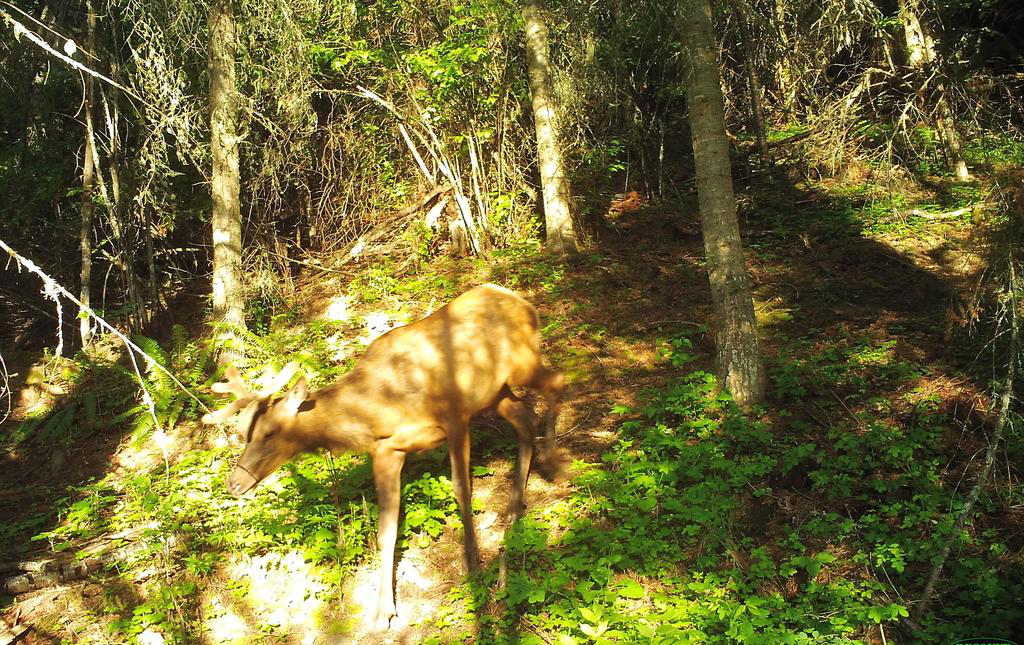

In [132]:
img

In [171]:
img = open_image(path/'test_images/cdd236f2-2c0b-11e9-bcad-06f10d5896c4.jpg');
pred = learn.predict(img); pred

(Category 18,
 tensor(11),
 tensor([1.9108e-02, 4.3219e-01, 8.7010e-05, 1.4653e-05, 7.4122e-04, 1.0637e-03,
         3.4502e-03, 2.5666e-06, 3.9258e-06, 2.5520e-03, 3.3842e-03, 5.3727e-01,
         3.1425e-05, 1.0522e-04]))

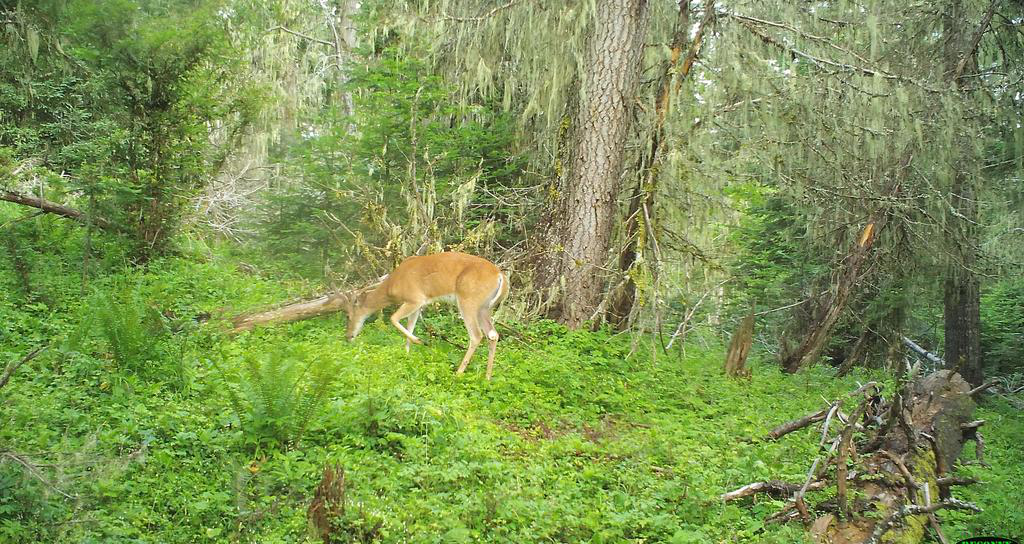

In [172]:
img